In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from environment_batched import BatchedMarket, BatchedLeontief, BatchedFirm, BatchedEnvironment
from models.policy import BetaPolicyNetwork, DeterministicPolicyNetwork, BetaPolicyNetwork2
from models.critic import CentralizedCritic, CentralizedCritic2
from models.utils import get_state, get_state_dim, process_actions, get_action_dim
from trainer import TrainerAC, TrainerSAC, Trainer3
from utils.plotting import plot_actions, plot_environment, plot_volumes

In [3]:
torch.manual_seed(123)
torch.backends.cudnn.deterministic = True
device = 'cuda'
# Гиперпараметры рынка
market_kwargs = dict(
    start_volumes=2,      # У всех фирм в резервах изначально 4 товара А и 10 товара Б
    base_price=50,         # Изначальные цены на рынке - 50 
    start_gains=500,       # Изначальные финансовые ресурсы у каждой фирмы - 500
    deprecation_steps=2,   # За сколько ходов износится основной капитал
    min_price=1,           # Минимальная возможная цена на рынке
    max_price=100          # Максимальная возможная цена на рынке
)

In [4]:
# Производственные функции
prod_functions = [
    BatchedLeontief(torch.tensor([1, 0]), torch.tensor([0, 2]), device=device),  # 1 товара А + 0 товара Б => 2 товара Б 
    BatchedLeontief(torch.tensor([0, 1]), torch.tensor([2, 0]), device=device),  # 0 товара А + 1 товар  Б => 2 товара А.
]

In [5]:
env = BatchedEnvironment(market_kwargs,
                         BetaPolicyNetwork,
                         prod_functions,
                         invest_functions=None,
                         target='production',
                         production_reg=0,
                         batch_size=512)
critic = CentralizedCritic
trainer = TrainerSAC(env,
                     q_critic=critic,
                     batch_size=512,
                     learning_rates=(3e-4, 3e-4),
                     buffer_size=8192 * 64,
                     entropy_reg=0.01,
                     entropy_gamma=1
                     )

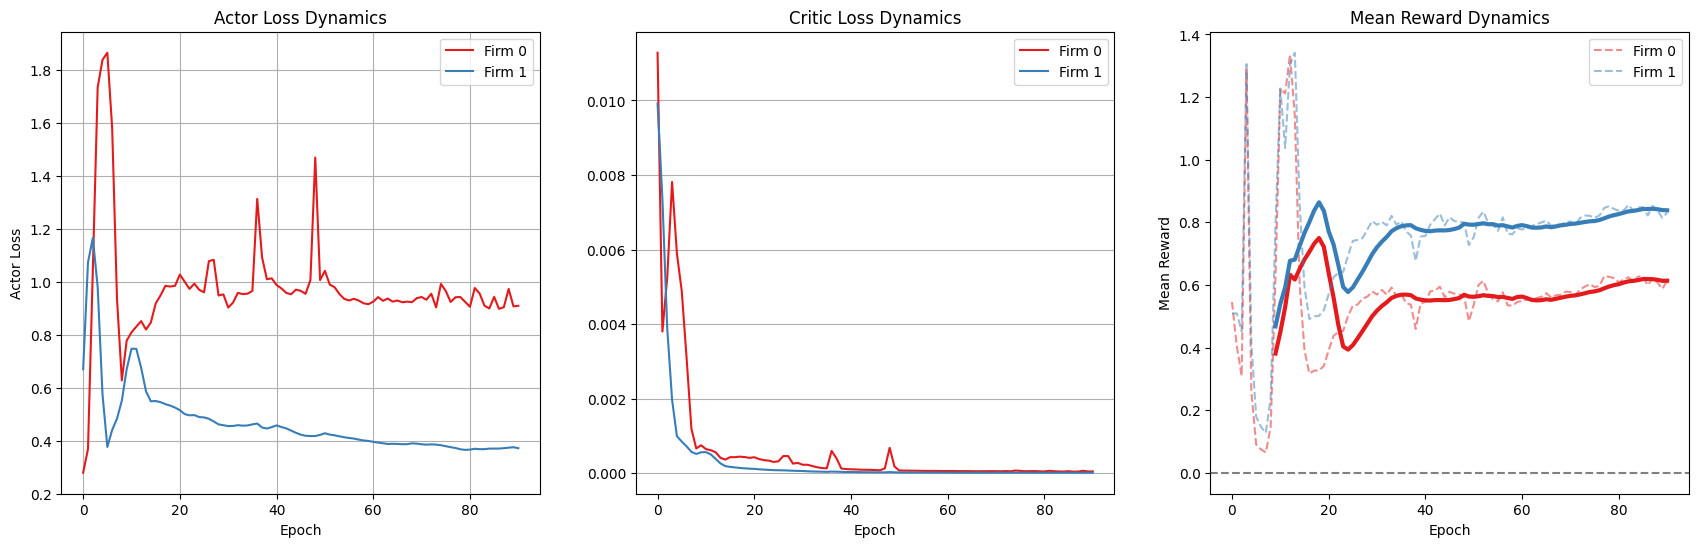

 38%|██████████████████████▉                                      | 94/250 [01:51<03:14,  1.24s/it, LR=0.000187, Buffer Index=491520, Order=[0, 1]]

In [ ]:
# SPECTRAL NORM + init_actor, hidden_size=64
trainer.train(250, episode_length=32, shuffle_order=False)
#
env.change_batch_size(1)
env.reset()
n_periods = 64
for i in range(n_periods):
    env.step_and_record(i % env.market.n_firms)
    
plot_environment(env.state_history)
plot_volumes(env.state_history)
plot_actions(env.actions_history[0], 'Политика Фирма 1 (1)')
plot_actions(env.actions_history[1], 'Политика Фирма 2 (2)')


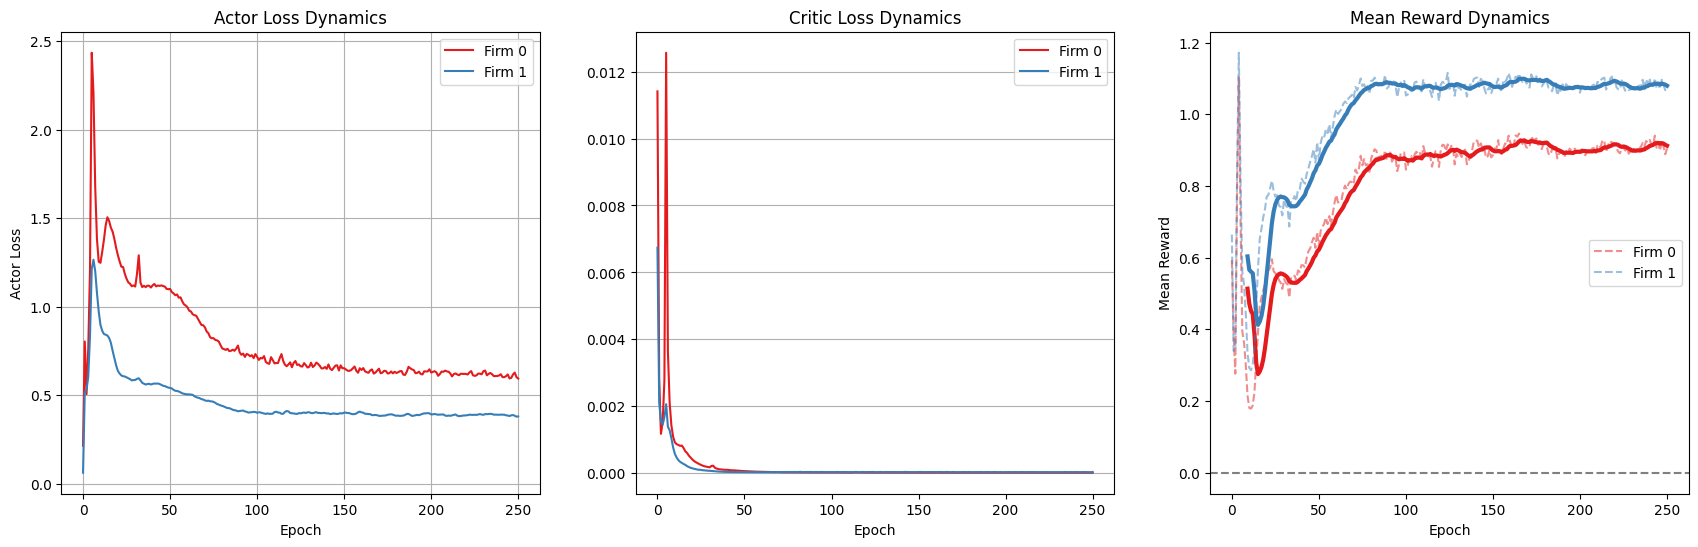

100%|█████████████████████████████████████████████████████████████| 250/250 [05:06<00:00,  1.23s/it, LR=8.53e-5, Buffer Index=458752, Order=[0, 1]]


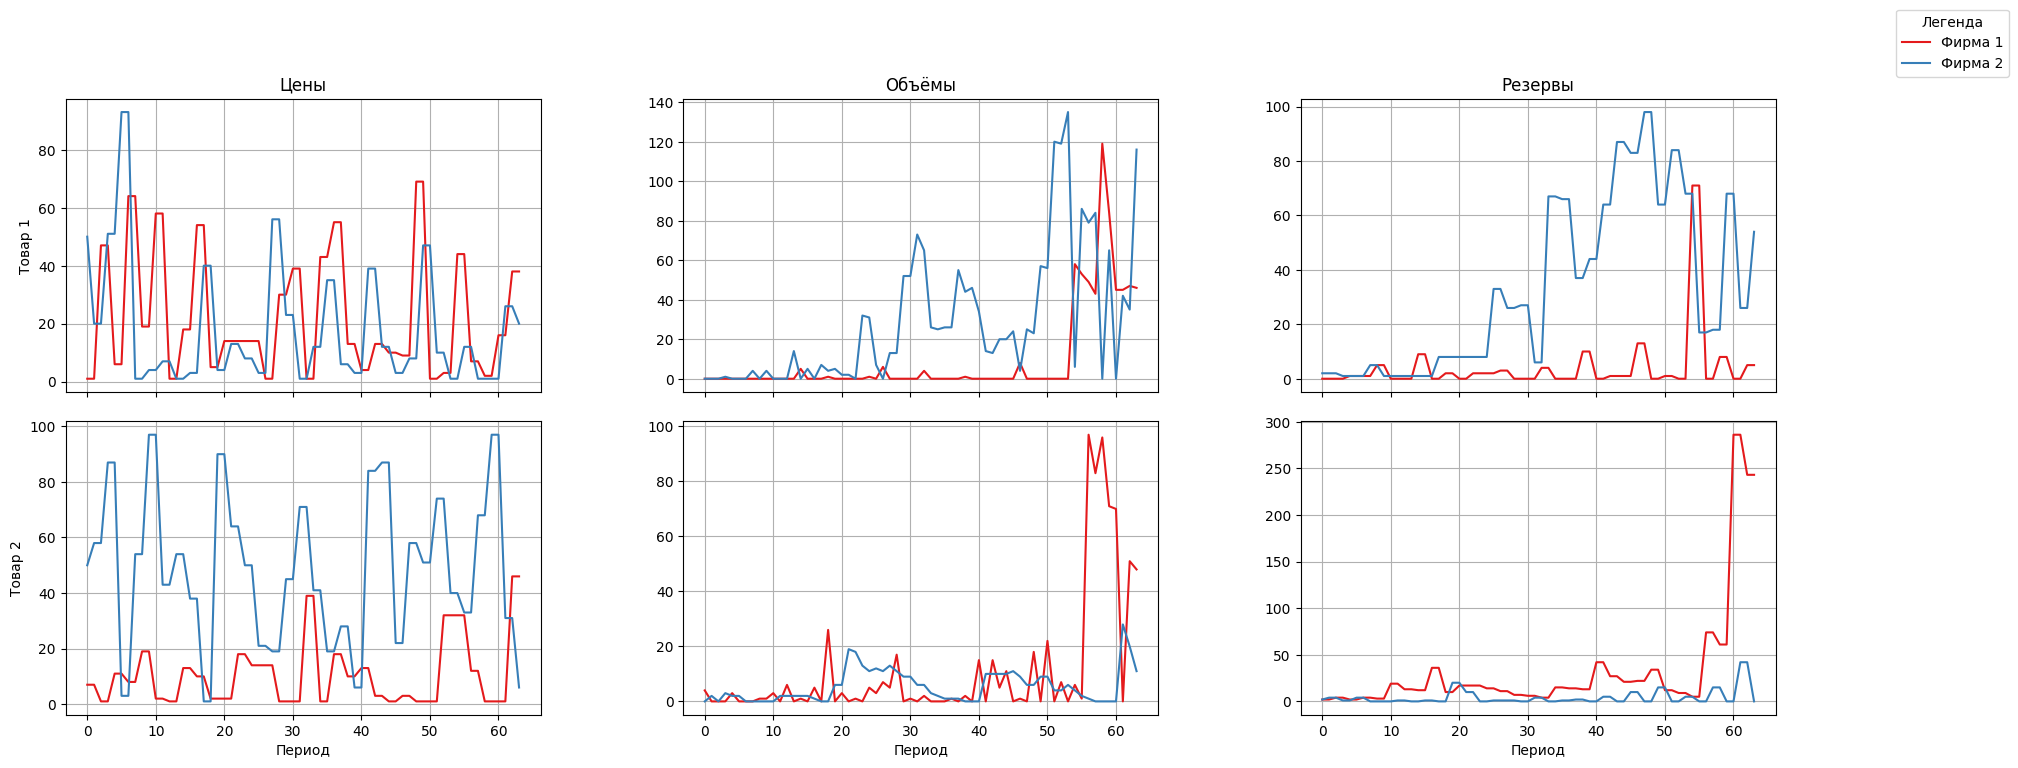

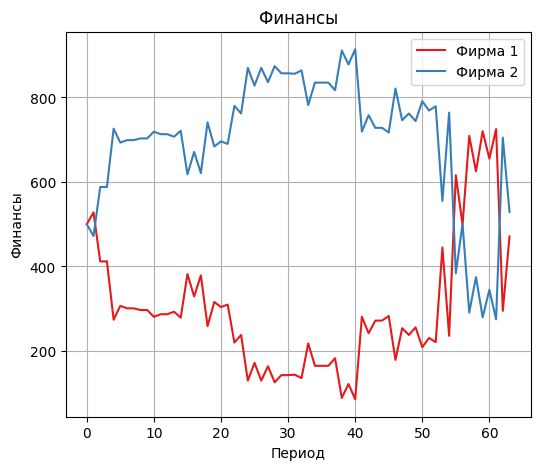

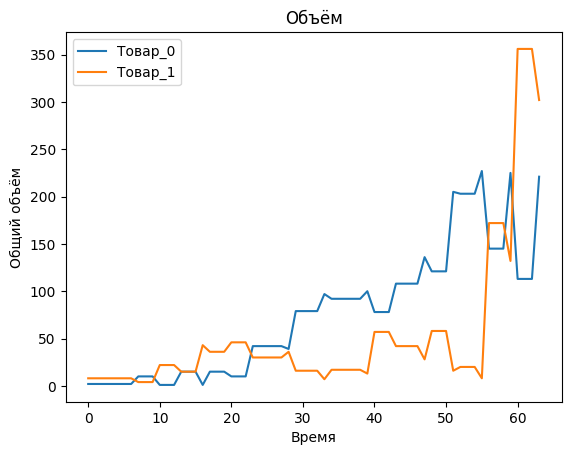

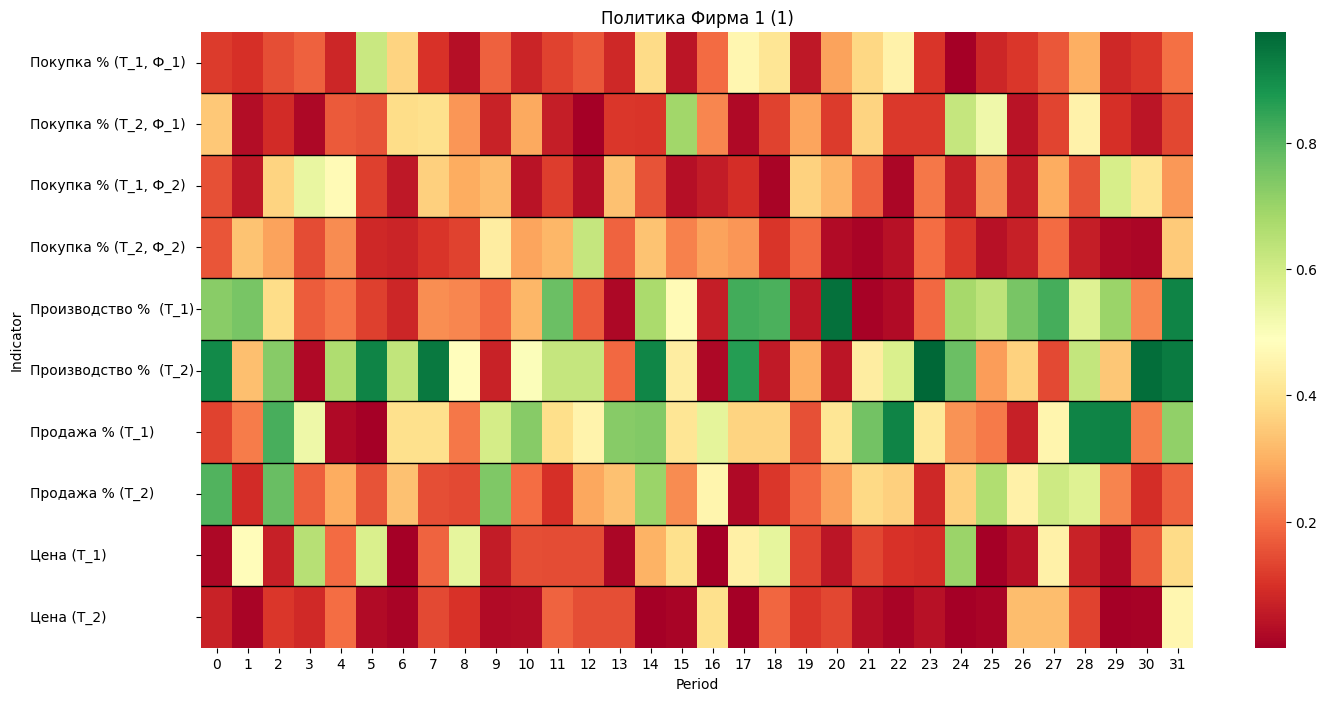

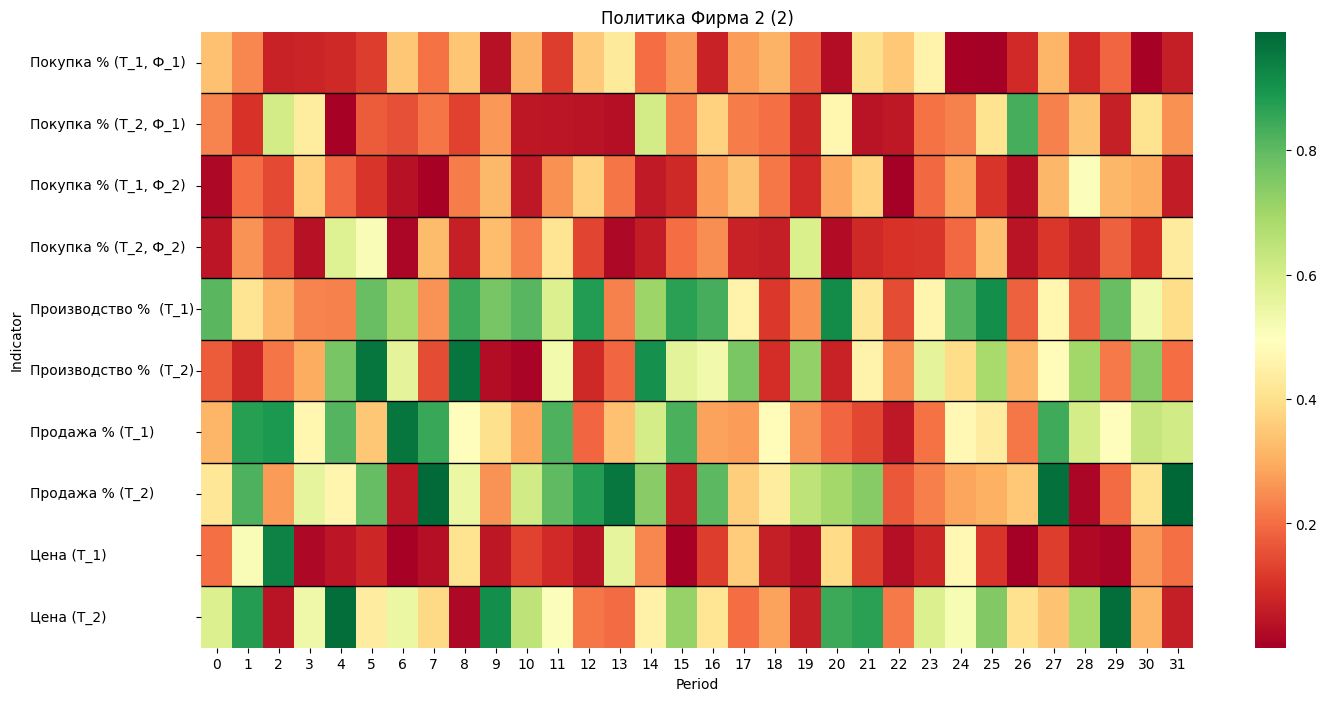

In [7]:
# SPECTRAL NORM + init_actor, hidden_size=64
trainer.train(250, episode_length=32, shuffle_order=False)
#
env.change_batch_size(1)
env.reset()
n_periods = 64
for i in range(n_periods):
    env.step_and_record(i % env.market.n_firms)
    
plot_environment(env.state_history)
plot_volumes(env.state_history)
plot_actions(env.actions_history[0], 'Политика Фирма 1 (1)')
plot_actions(env.actions_history[1], 'Политика Фирма 2 (2)')


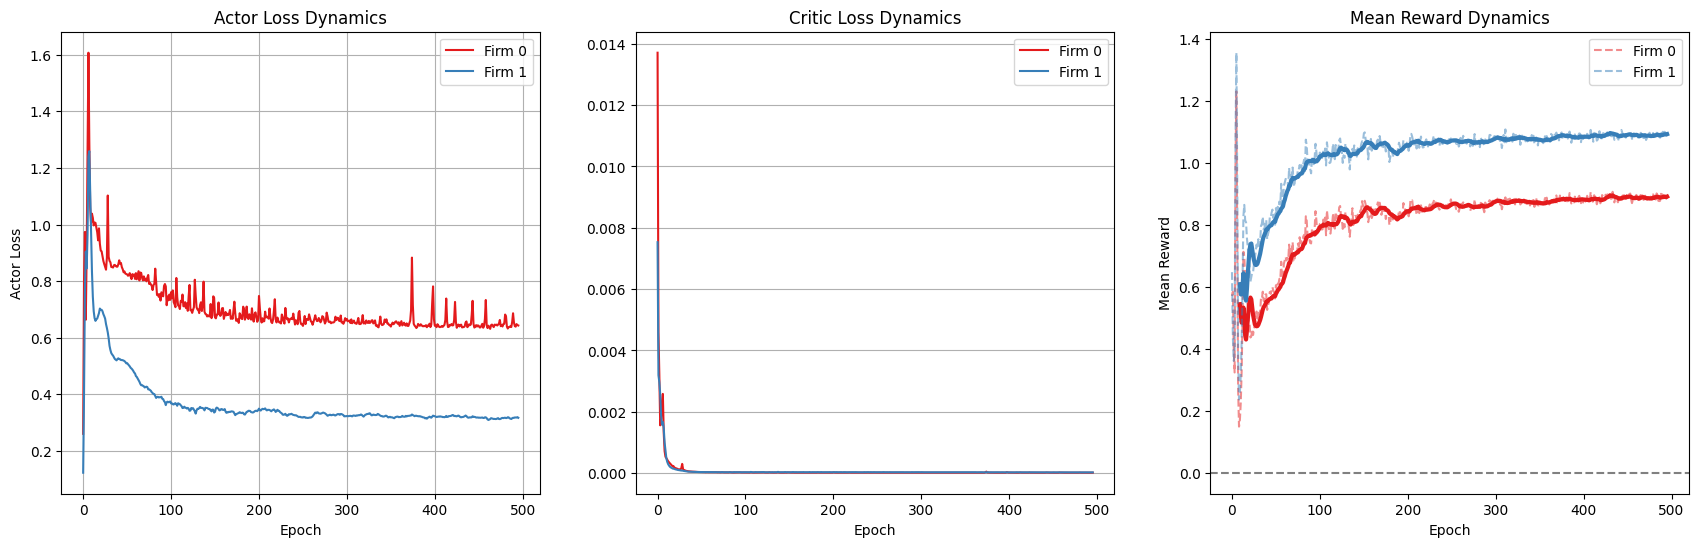

100%|█████████████████████████████████████████████████████████████| 500/500 [10:24<00:00,  1.25s/it, LR=2.45e-5, Buffer Index=327680, Order=[0, 1]]


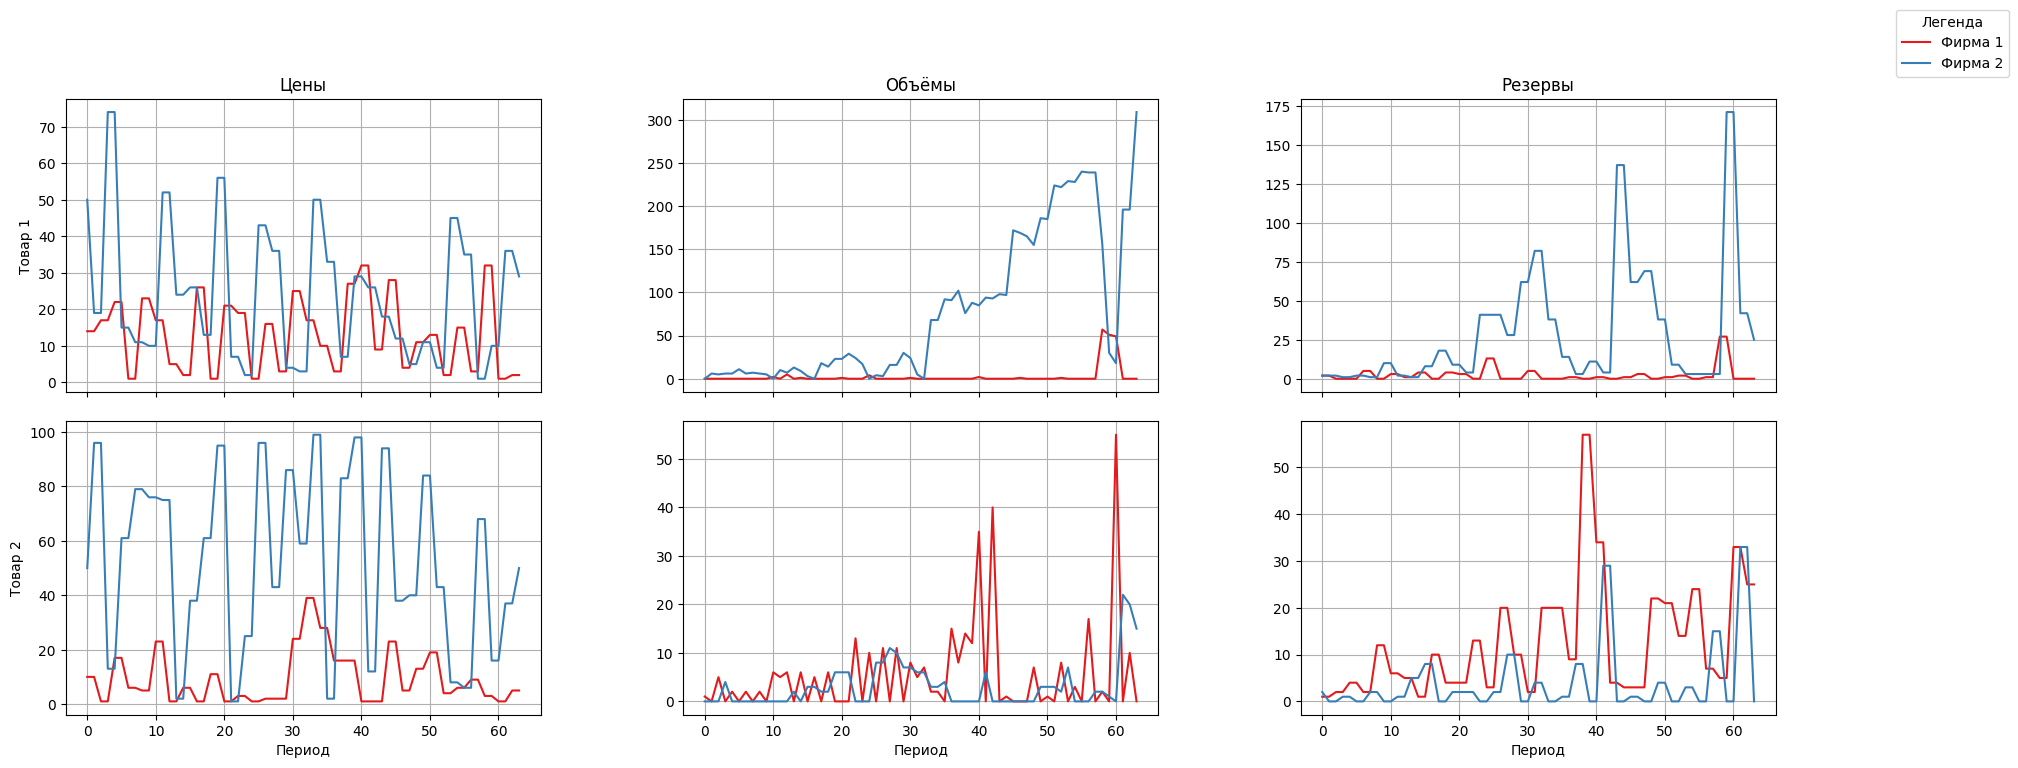

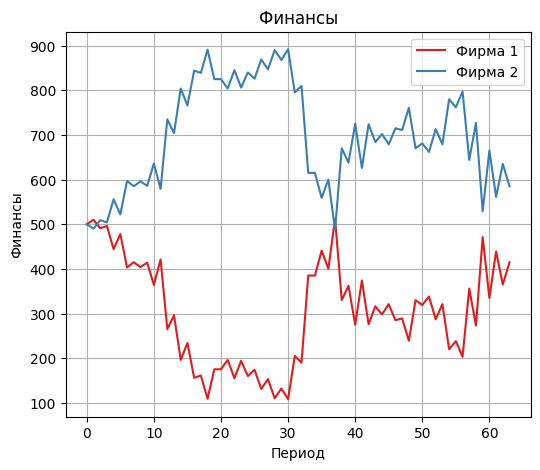

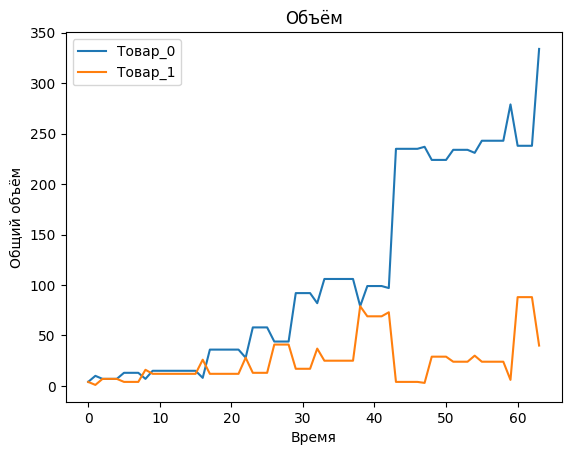

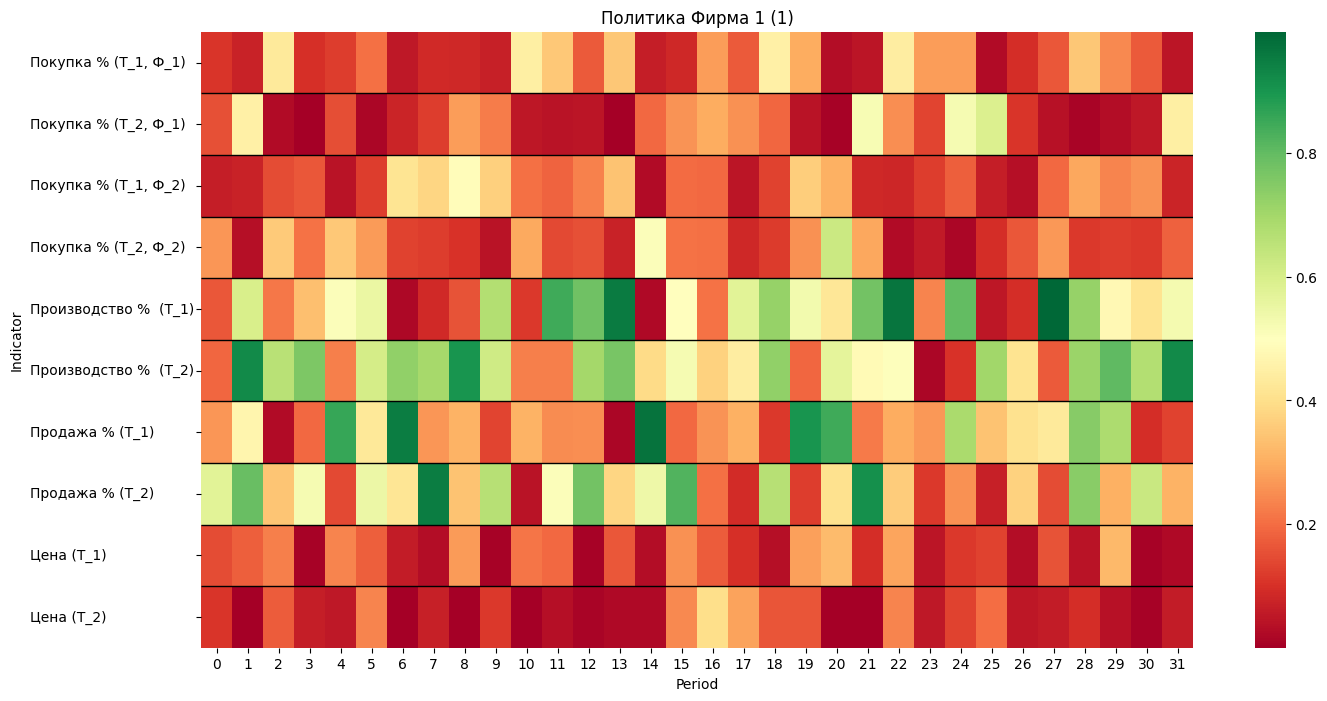

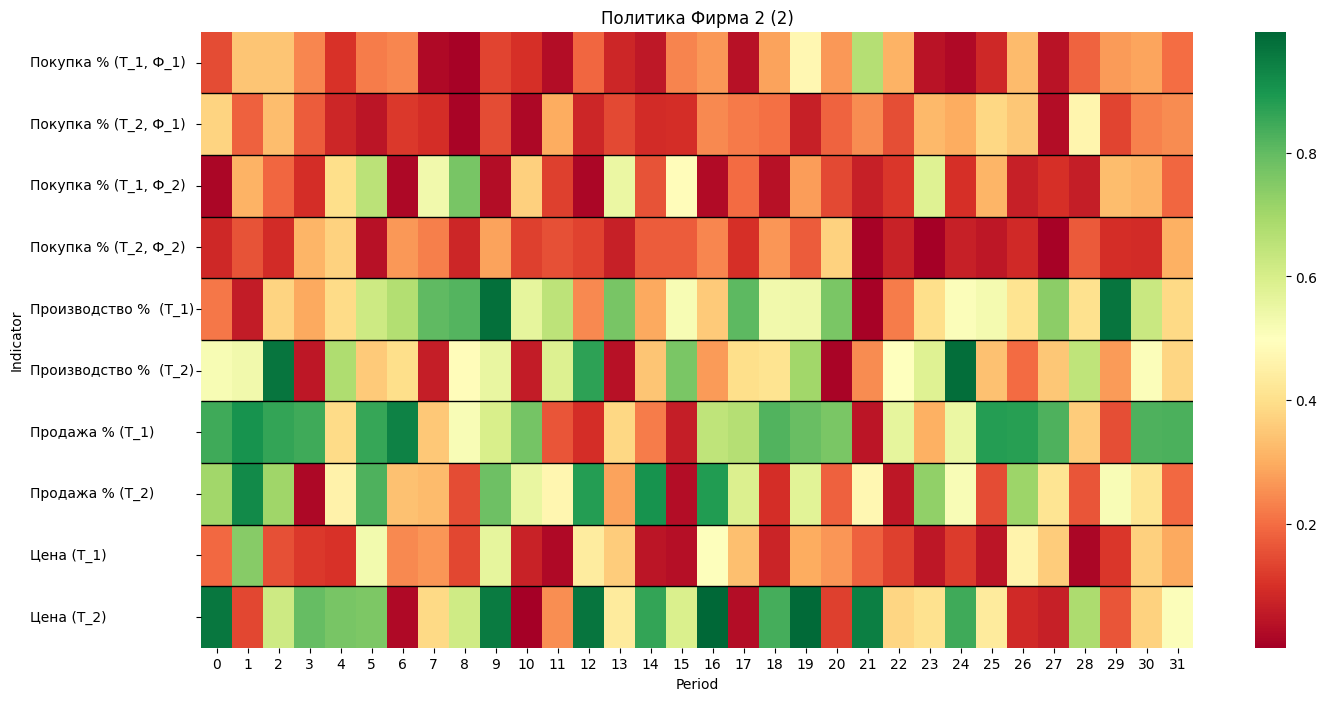

In [6]:
# SPECTRAL NORM + init_actor
trainer.train(500, episode_length=32, shuffle_order=False)
#
env.change_batch_size(1)
env.reset()
n_periods = 64
for i in range(n_periods):
    env.step_and_record(i % env.market.n_firms)
    
plot_environment(env.state_history)
plot_volumes(env.state_history)
plot_actions(env.actions_history[0], 'Политика Фирма 1 (1)')
plot_actions(env.actions_history[1], 'Политика Фирма 2 (2)')


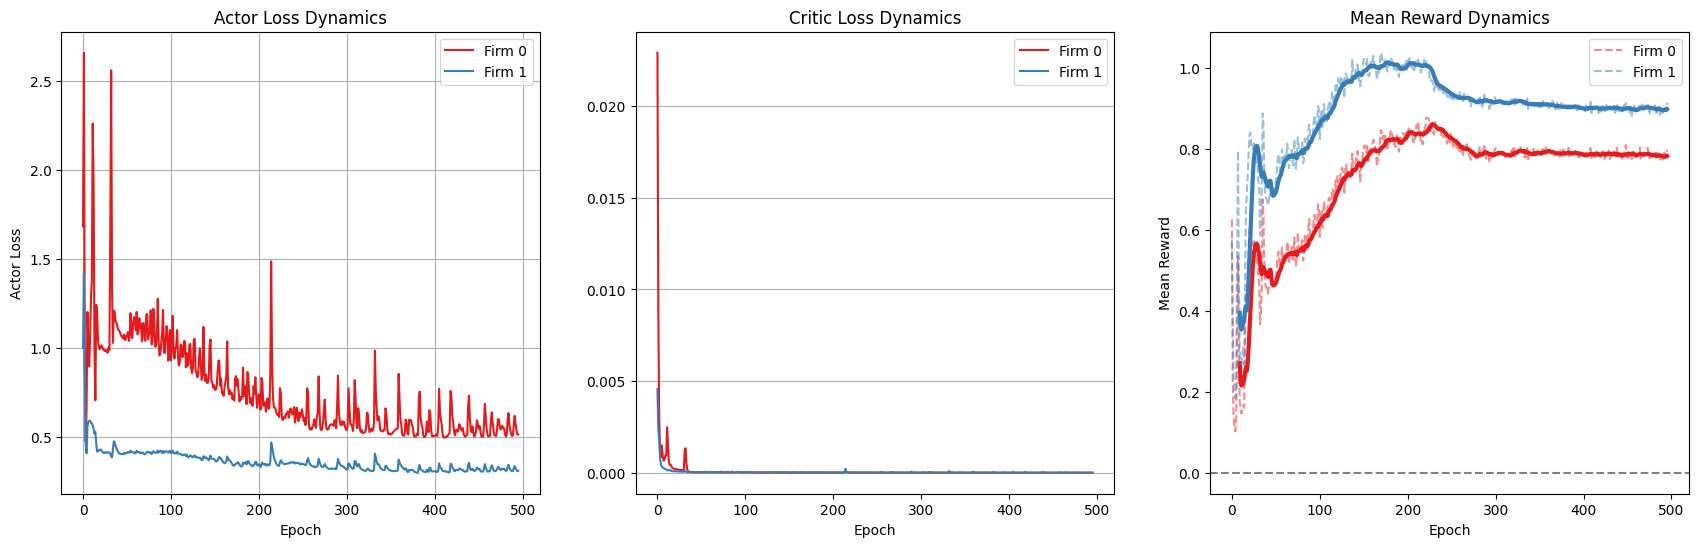

100%|█████████████████████████████████████████████████████████████| 500/500 [10:57<00:00,  1.31s/it, LR=8.16e-5, Buffer Index=327680, Order=[0, 1]]


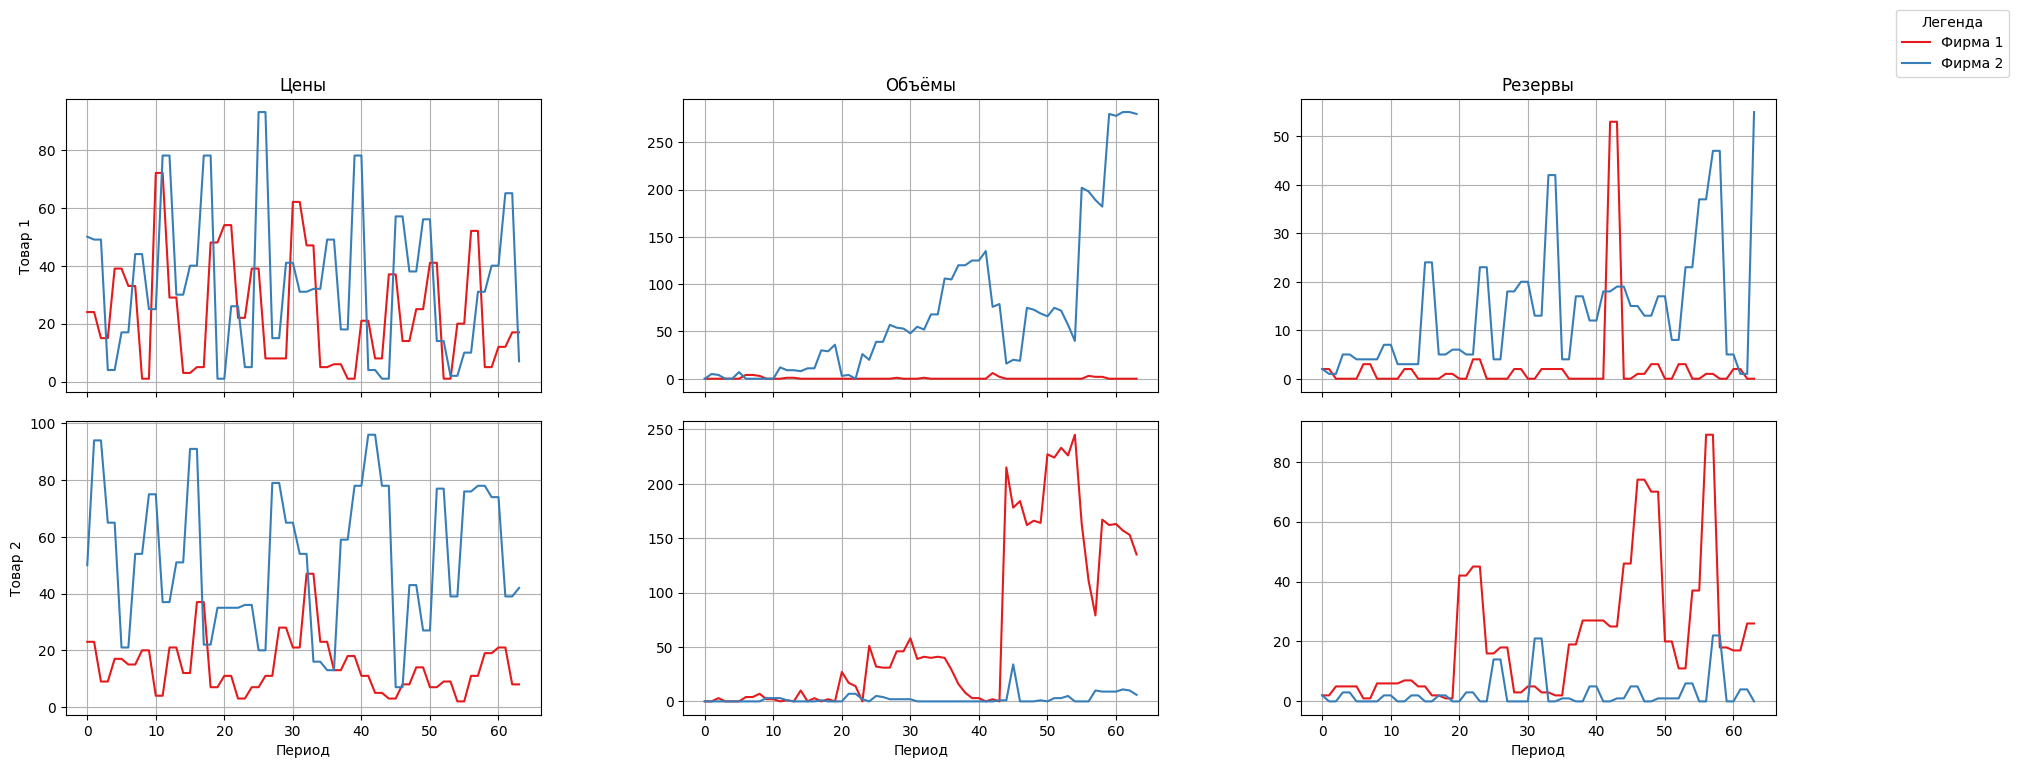

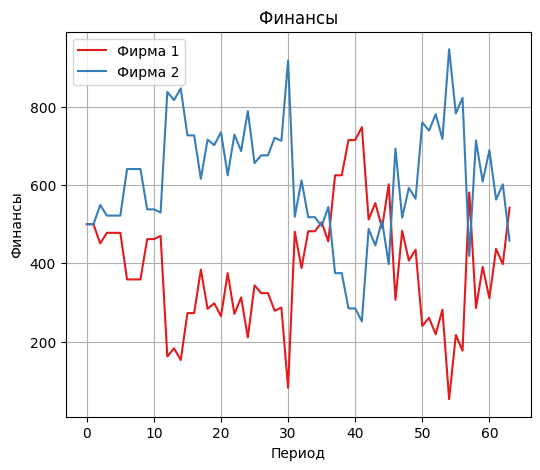

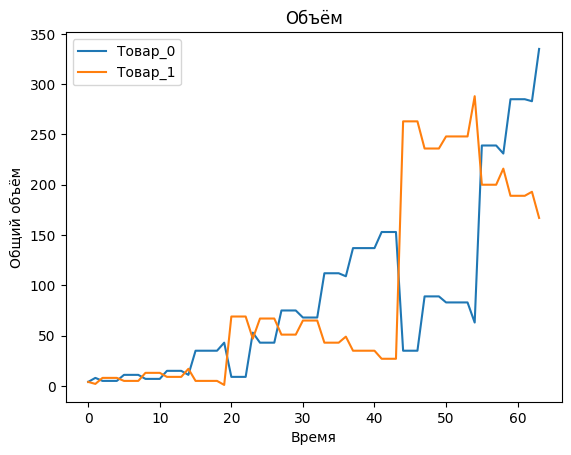

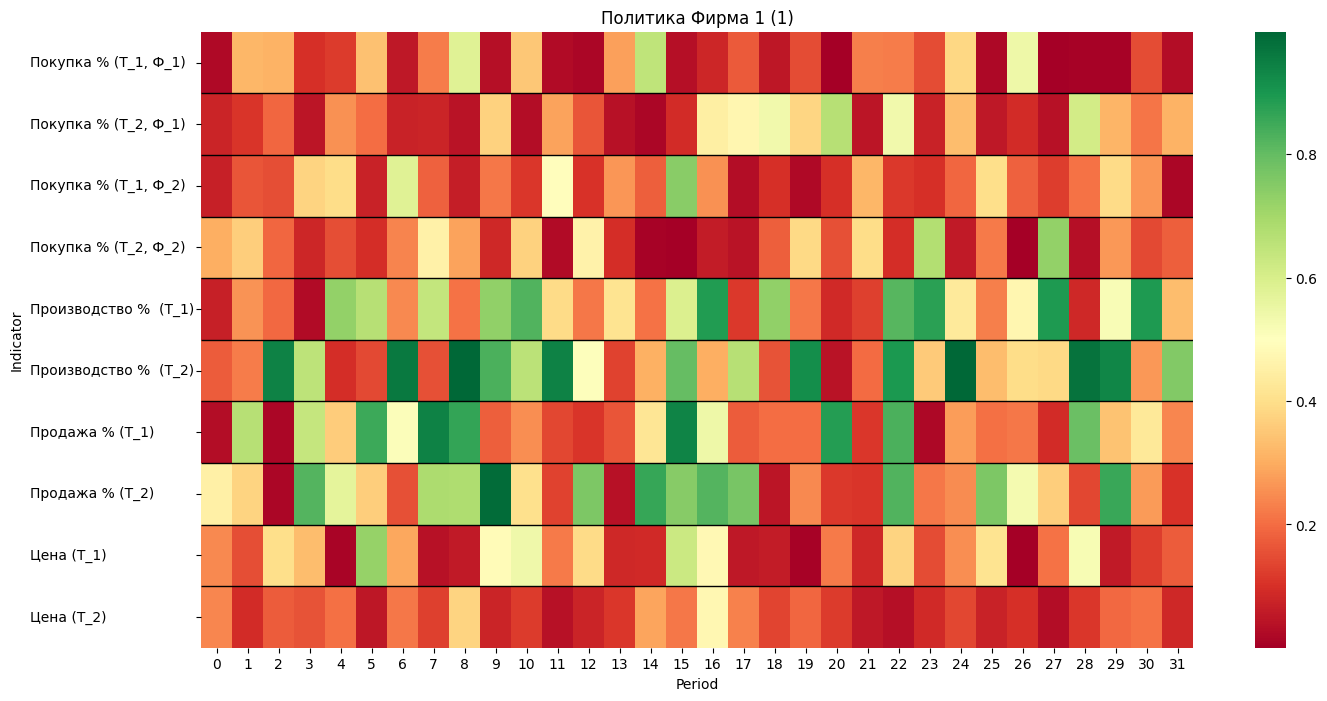

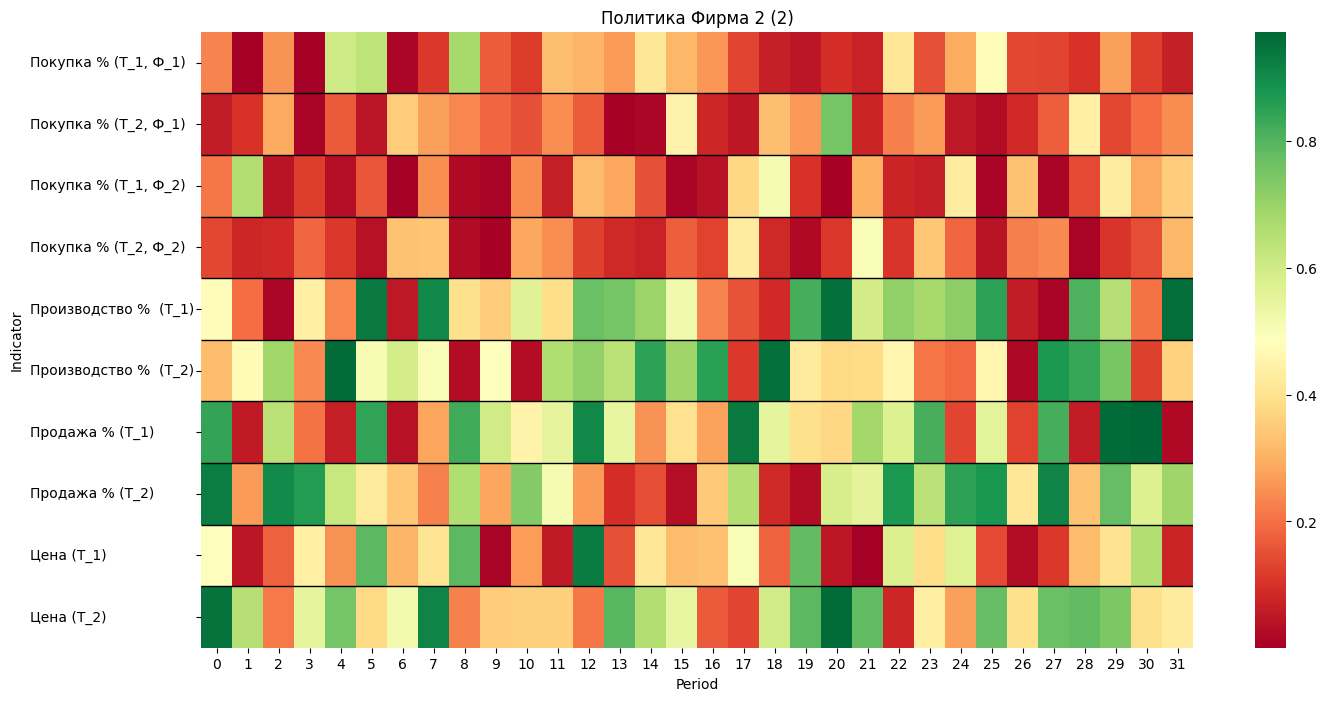

In [18]:
# SPECTRAL NORM everywhere
trainer.train(500, episode_length=32, shuffle_order=False)
#
env.change_batch_size(1)
env.reset()
n_periods = 64
for i in range(n_periods):
    env.step_and_record(i % env.market.n_firms)
    
plot_environment(env.state_history)
plot_volumes(env.state_history)
plot_actions(env.actions_history[0], 'Политика Фирма 1 (1)')
plot_actions(env.actions_history[1], 'Политика Фирма 2 (2)')


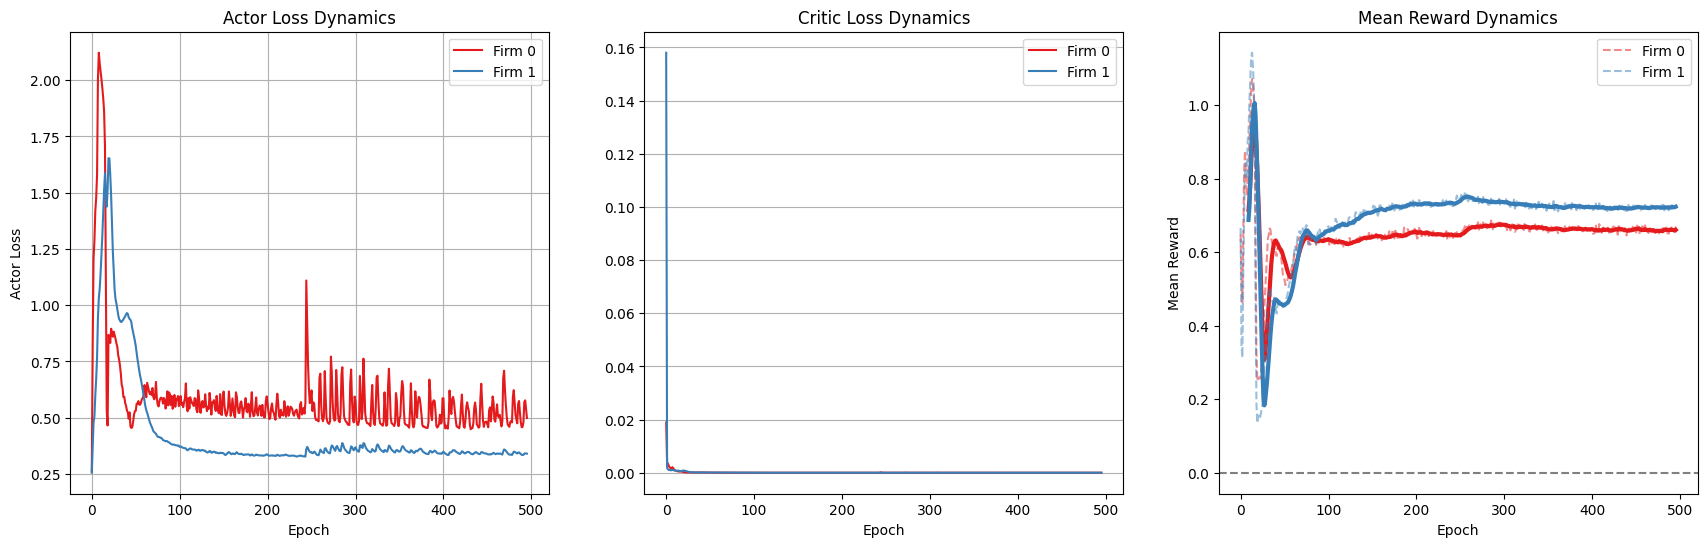

100%|█████████████████████████████████████████████████████████████| 500/500 [10:29<00:00,  1.26s/it, LR=2.45e-5, Buffer Index=327680, Order=[0, 1]]


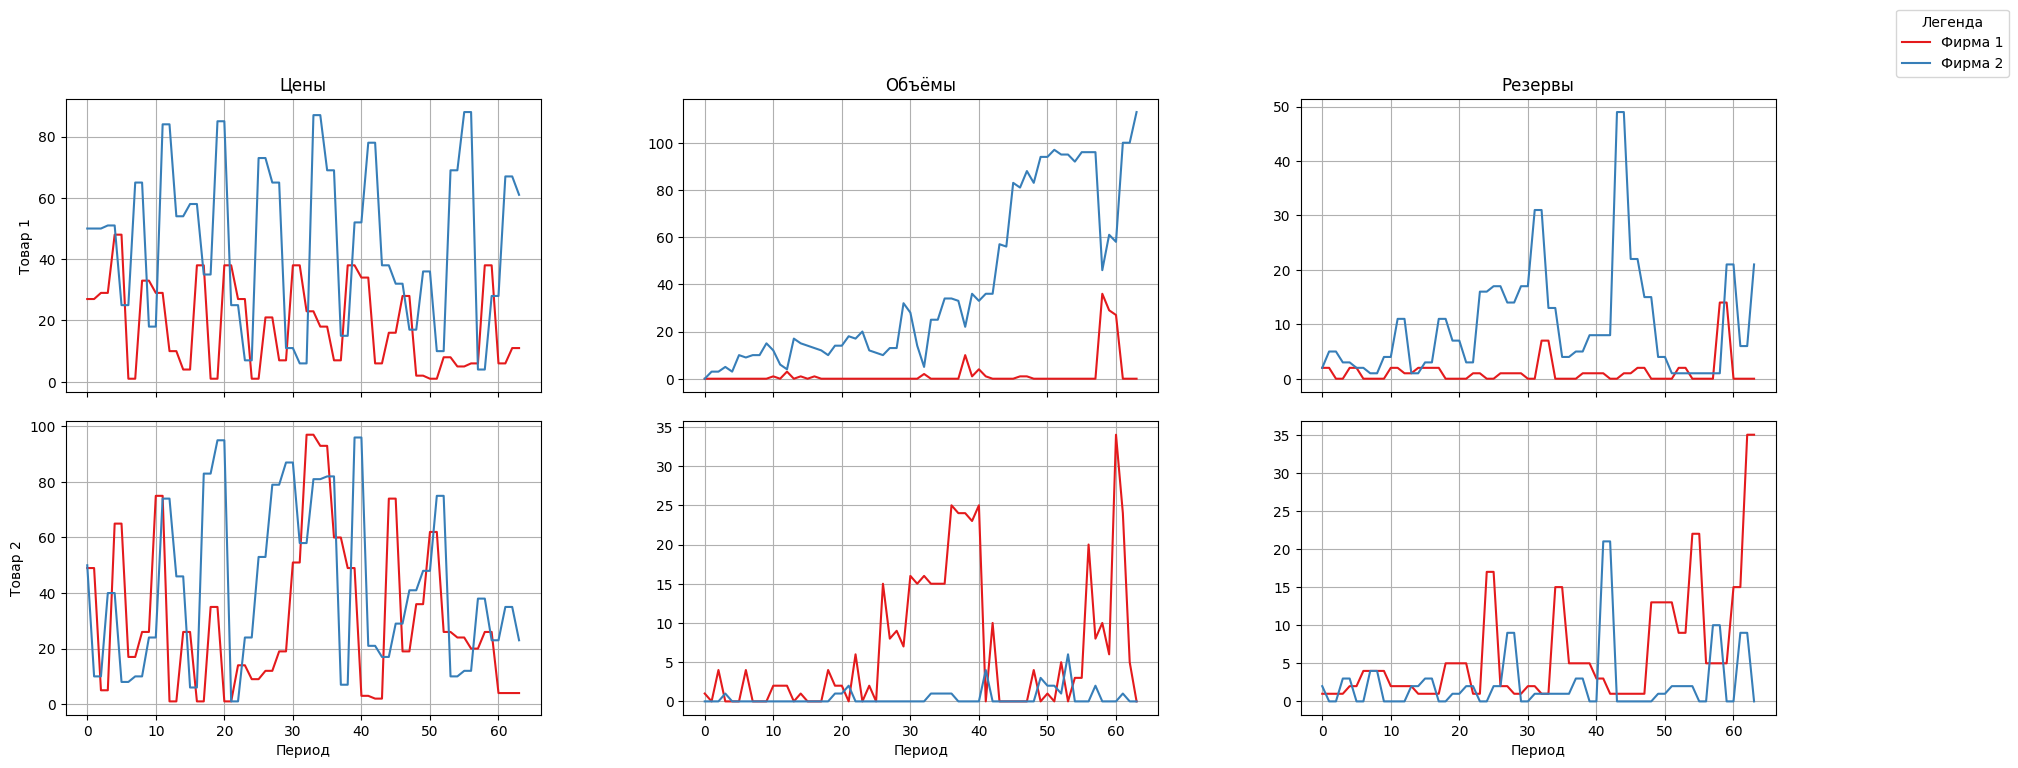

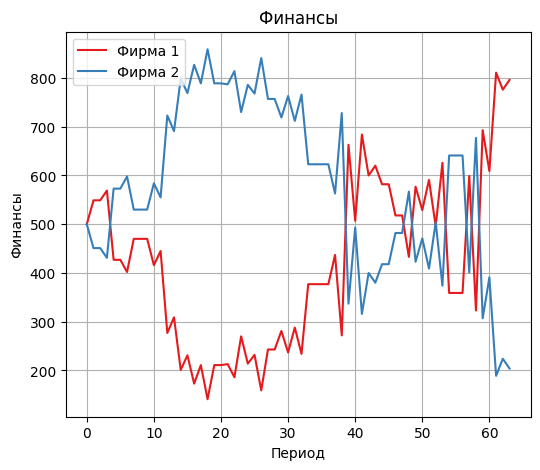

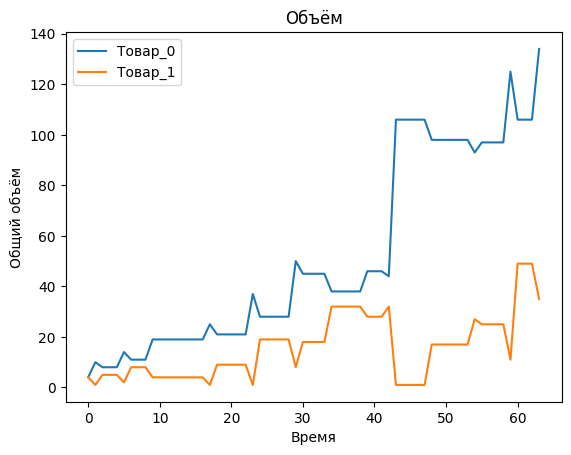

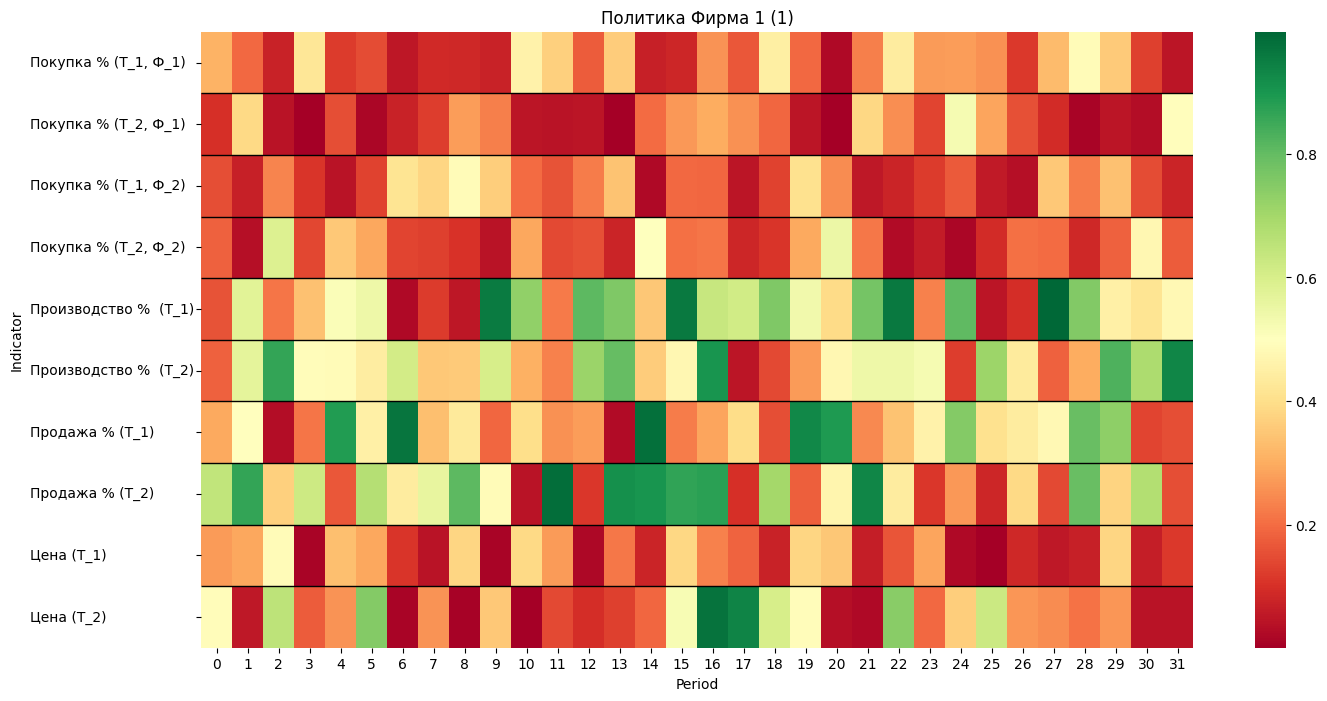

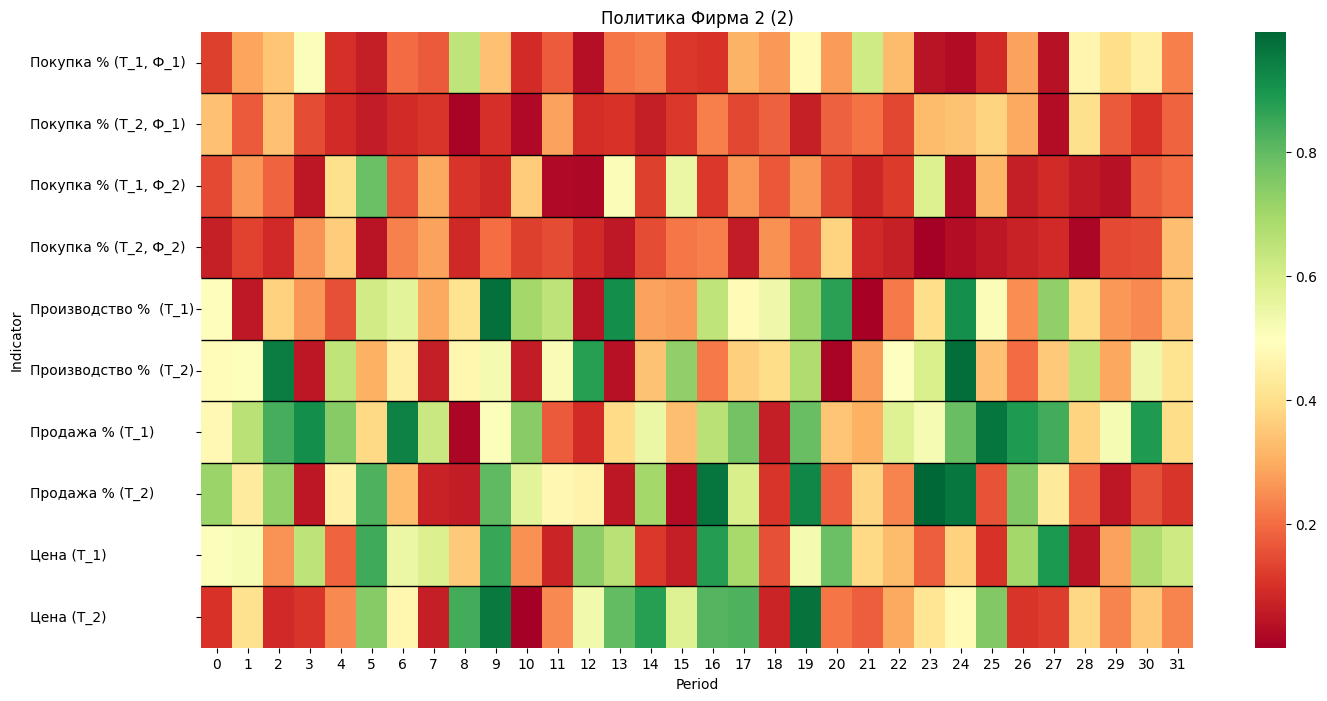

In [6]:
# SPECTRAL NORM
trainer.train(500, episode_length=32, shuffle_order=False)
#
env.change_batch_size(1)
env.reset()
n_periods = 64
for i in range(n_periods):
    env.step_and_record(i % env.market.n_firms)
    
plot_environment(env.state_history)
plot_volumes(env.state_history)
plot_actions(env.actions_history[0], 'Политика Фирма 1 (1)')
plot_actions(env.actions_history[1], 'Политика Фирма 2 (2)')


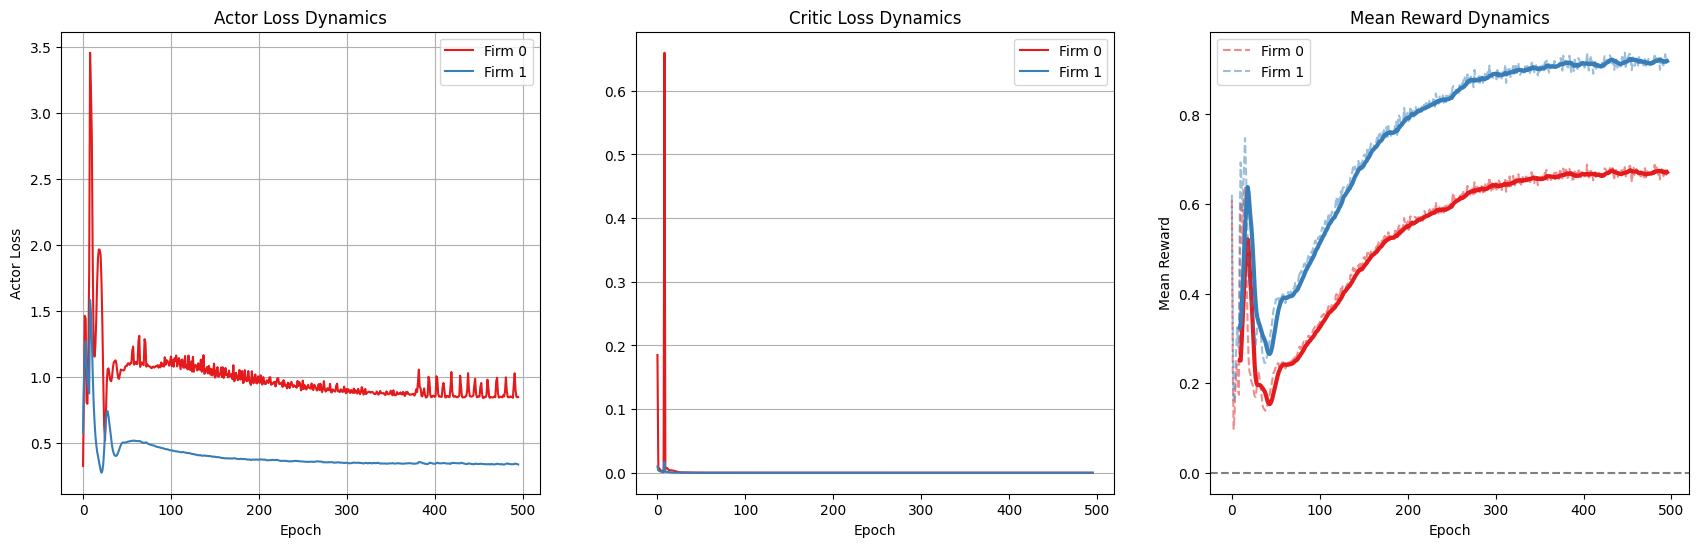

100%|█████████████████████████████████████████████████████████████| 500/500 [07:52<00:00,  1.06it/s, LR=2.45e-5, Buffer Index=327680, Order=[0, 1]]


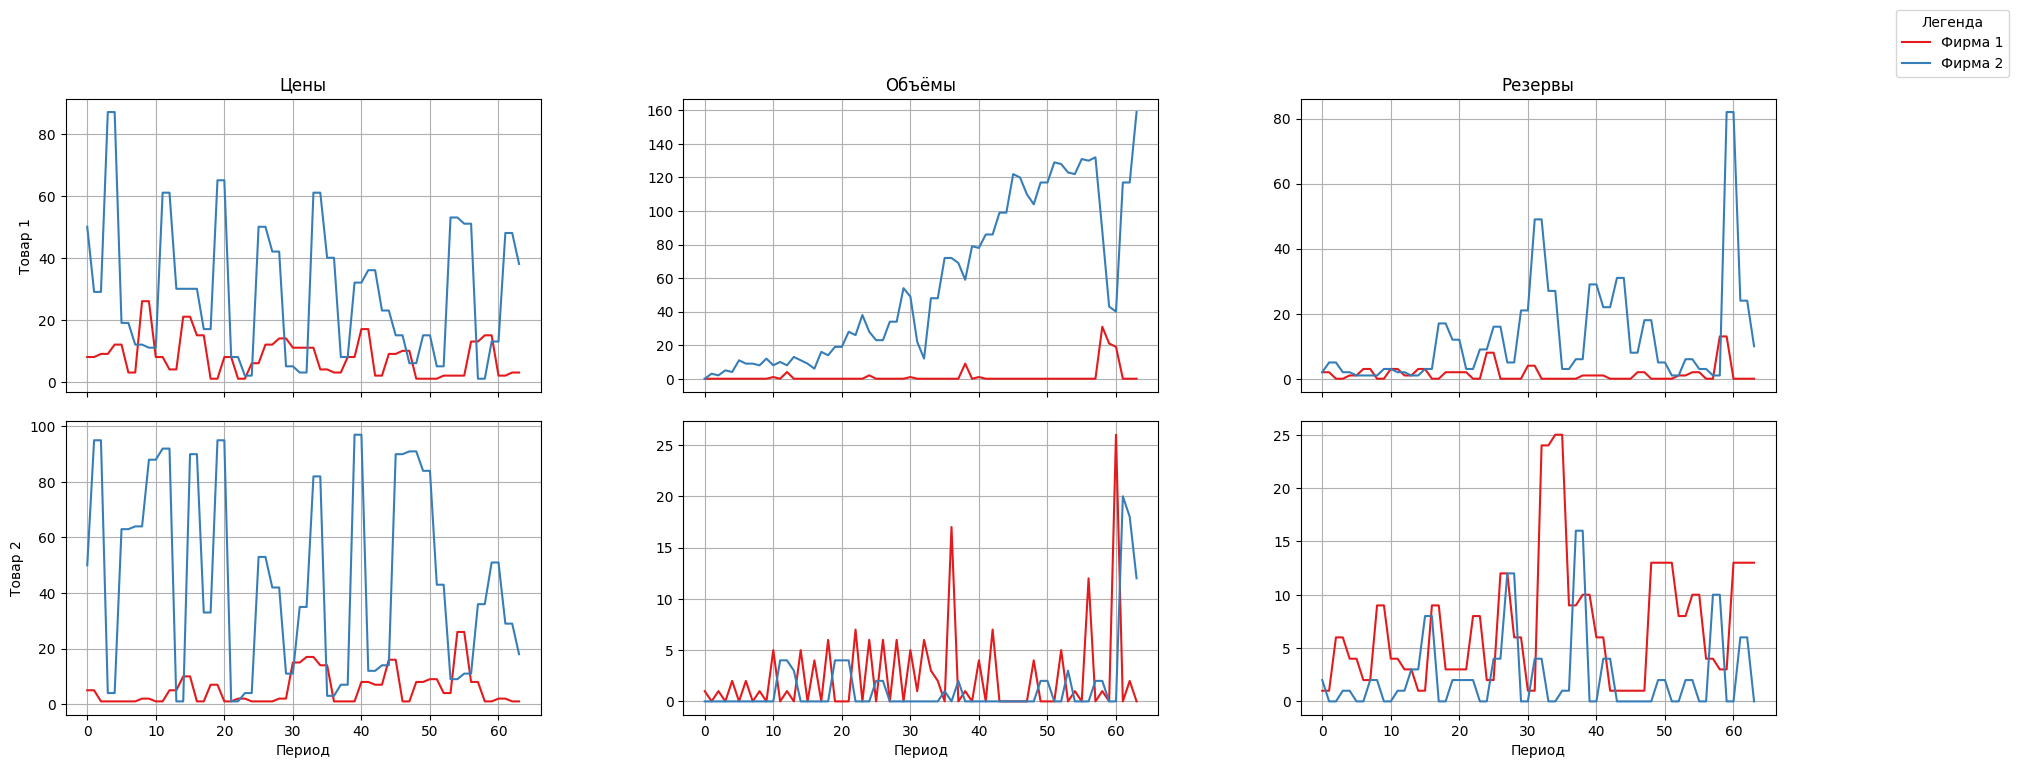

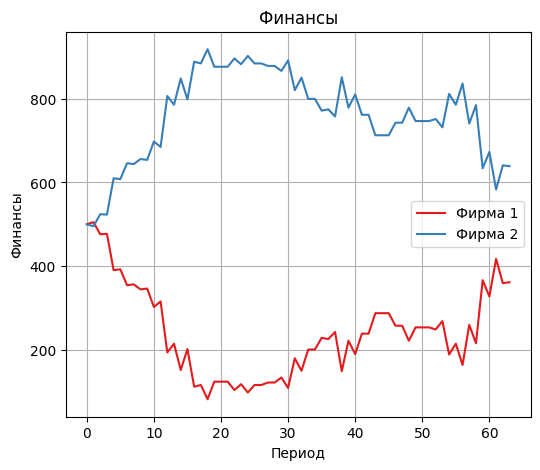

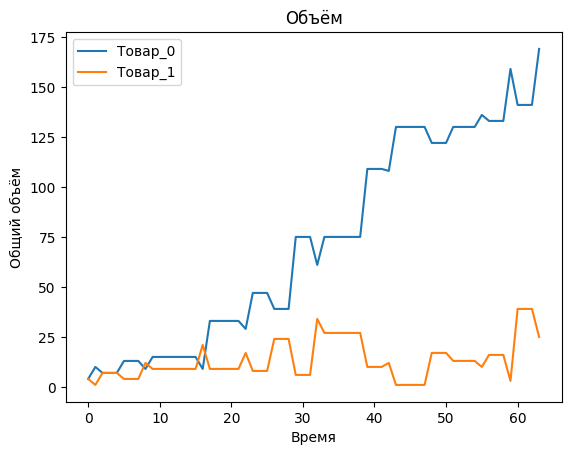

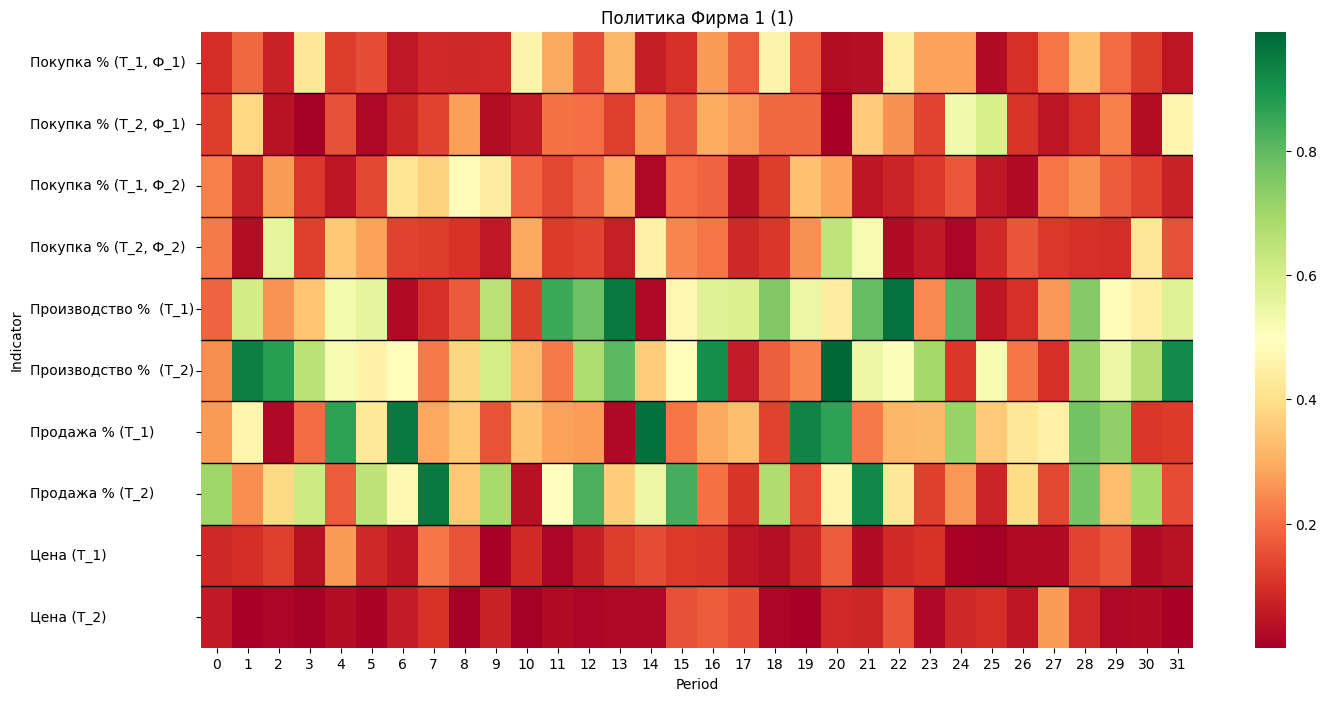

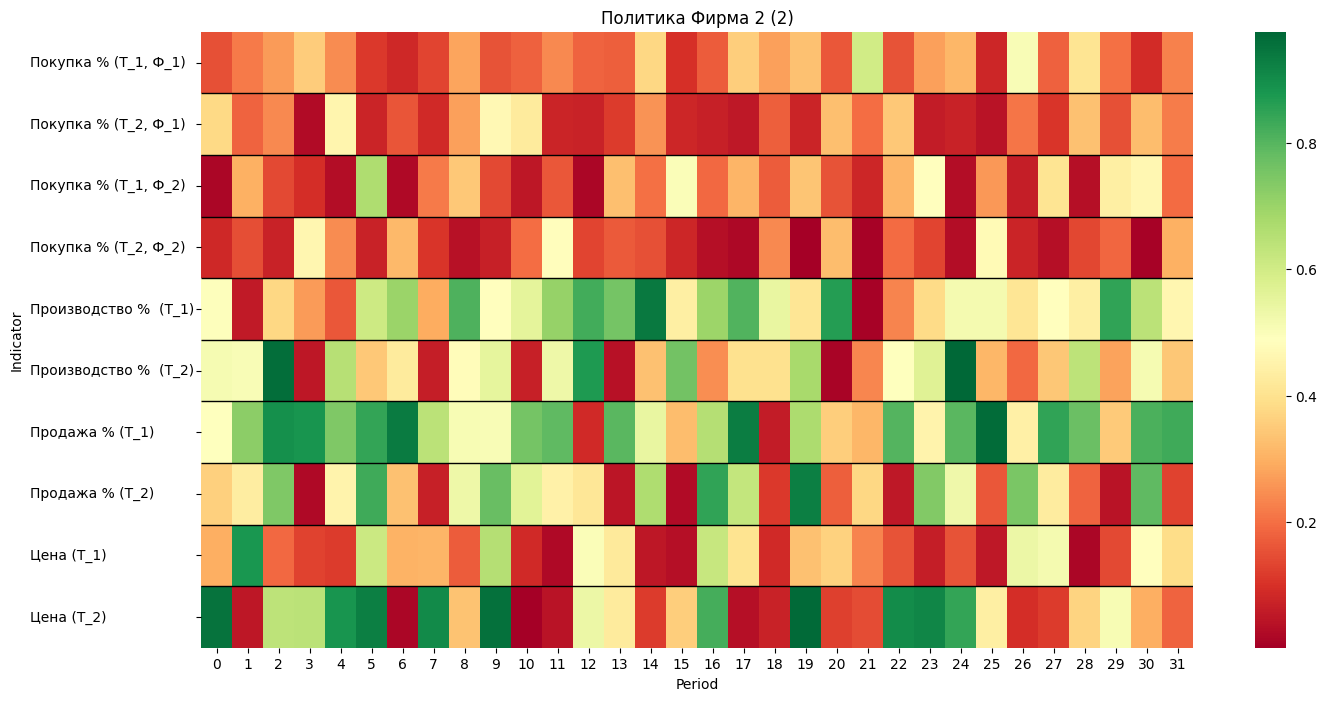

In [6]:
# SPECTRAL NORM
trainer.train(500, episode_length=32, shuffle_order=False)
#
env.change_batch_size(1)
env.reset()
n_periods = 64
for i in range(n_periods):
    env.step_and_record(i % env.market.n_firms)
    
plot_environment(env.state_history)
plot_volumes(env.state_history)
plot_actions(env.actions_history[0], 'Политика Фирма 1 (1)')
plot_actions(env.actions_history[1], 'Политика Фирма 2 (2)')


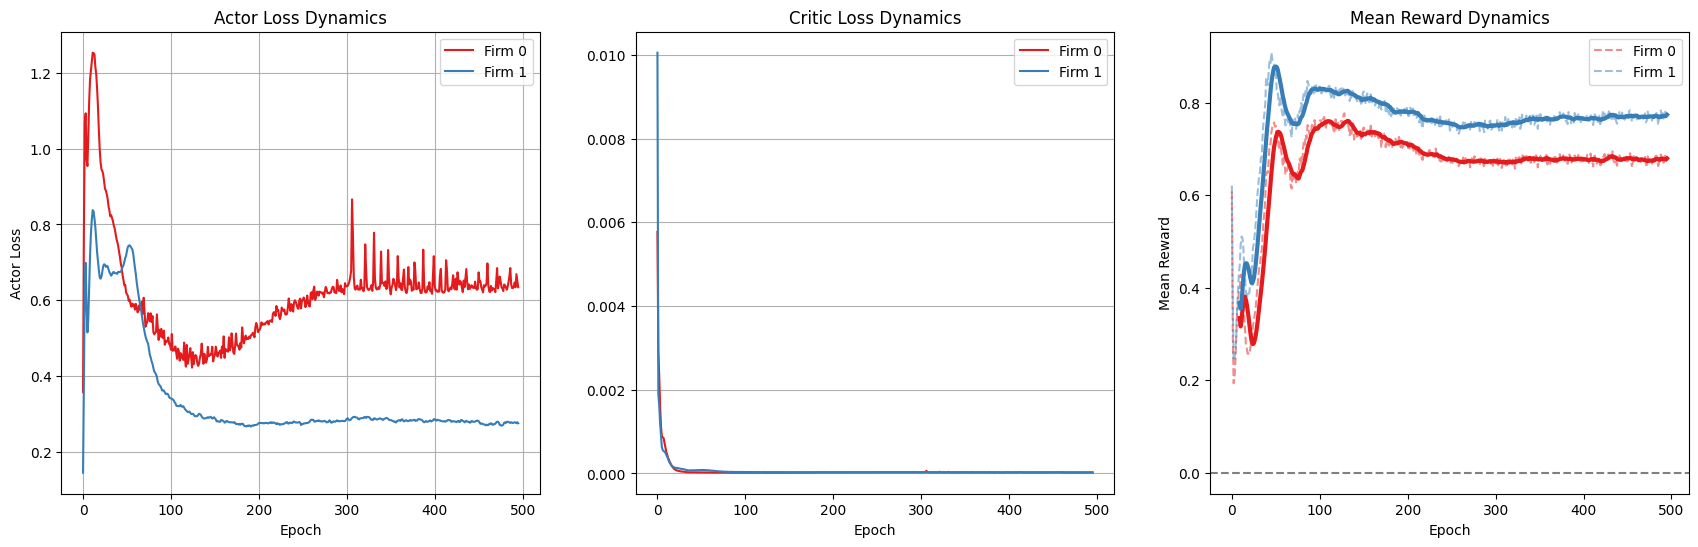

100%|█████████████████████████████████████████████████████████████| 500/500 [05:59<00:00,  1.39it/s, LR=2.45e-5, Buffer Index=327680, Order=[0, 1]]


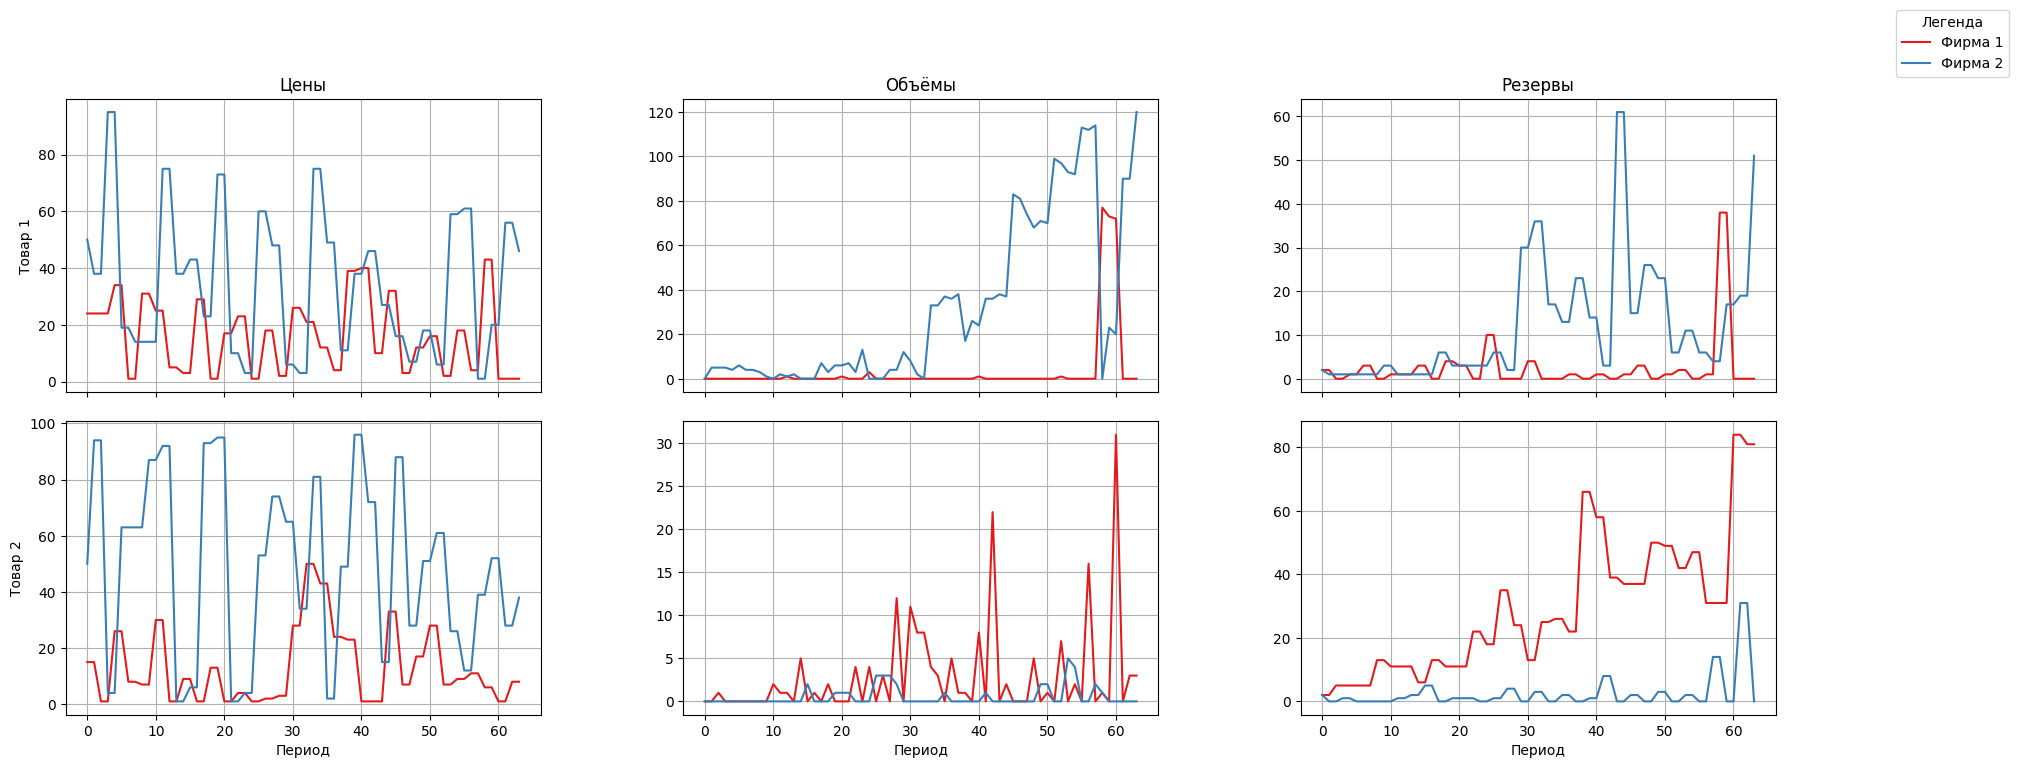

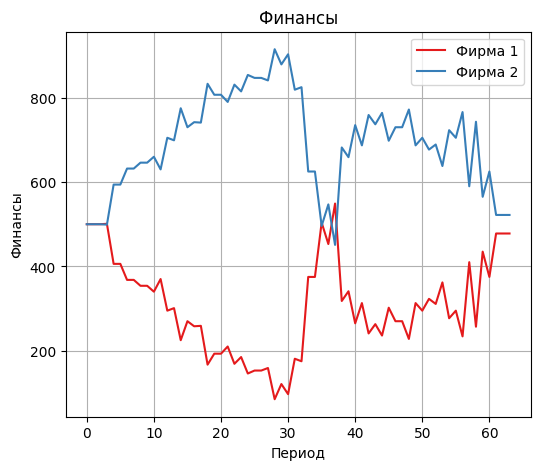

NameError: name 'plot_volumes' is not defined

In [13]:
# NO SPECTRAL NORM
trainer.train(500, episode_length=32, shuffle_order=False)
#
env.change_batch_size(1)
env.reset()
n_periods = 64
for i in range(n_periods):
    env.step_and_record(i % env.market.n_firms)
    
plot_environment(env.state_history)
plot_volumes(env.state_history)
plot_actions(env.actions_history[0], 'Политика Фирма 1 (1)')
plot_actions(env.actions_history[1], 'Политика Фирма 2 (2)')


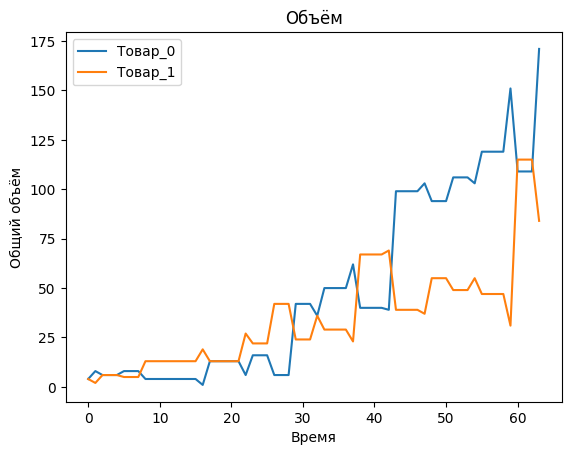

In [16]:
plot_volumes(env.state_history)
